## Ecuaciones diferenciales

Las ecuaciones diferenciales se resuelven en Python con el paquete <code>Scipy.integrate</code> usando la funcion <code>solve_ivp</code> (ya vista) u <code>odeint</code>. **odeint** requiere tres input:

\begin{align*}
    \text{y = odeint(model, $y_{0}$, t)}
\end{align*}

**model:** Nombre de la funcion que devuelve valores derivados en los valores solicitados <code>y</code> y <code>t</code> como <code>dydt = model(y, t)</code>.

$y_{0}$: Condiciones iniciales de los estados diferenciales.

t: Puntos temporales en los que debe calcularse la solucion. Los puntos internos adicionales a menudo se calculan para mantener la precision de la solucion, pero no se informan.

## Problema ejemplo

Un ejemplo de uso de *odeint* es con la siguiente ecuacion diferencial con el parametro *k*, la condicion inicial $y_{0}$ y la siguiente ecuacion diferencial.

\begin{align*}
    \frac{dy(t)}{dt} = -k\ y(t)
\end{align*}

El modelo, las condiciones iniciales y los puntos de tiempo se definen como entradas de *odeint* para calcular numericamente $y(t)$.

In [1]:
# Primero importar los paquetes Numpy, Scipy (odeint) y Matplotlib necesarios.
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

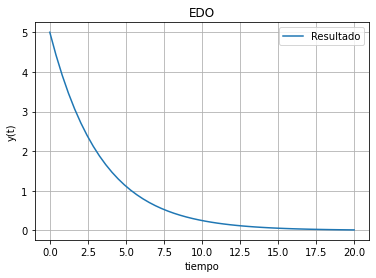

In [2]:
# funcion que devuelve dy/dt

def model(y, t): # Observar el orden de las variables
    k = 0.3 # parametro k
    dydt = -k * y # Observar la similitud de la expresion de la ecuacion matematica
    # Observese que el parametro t debe estar, aunque no se lo utilice y esta en segundo lugar
    return dydt

# Condicion inicial
y0 = 5

# 50 puntos en el tiempo
t = np.linspace(0, 20)

# solve ODE
y = odeint(model, y0, t)

# mostrar grafico
plt.title('EDO')
plt.plot(t, y)
plt.xlabel('tiempo')
plt.ylabel('y(t)')
plt.legend(['Resultado'])
plt.grid()
plt.show()

## Argumentos de entrada adicionales

Una cuarta entrada opcional es *args* que permite pasar informacion adicional a la funcion *model*. La entrada *args* es una secuencia de valores.
El argumento *k* ahora es una entrada a la funcion *model* a incluir un argumento de suma.

\begin{align*}
    \text{y = odeint(model, $y_{0}$, t, args)}
\end{align*}

*args*: Entradas adicionales al modelo.

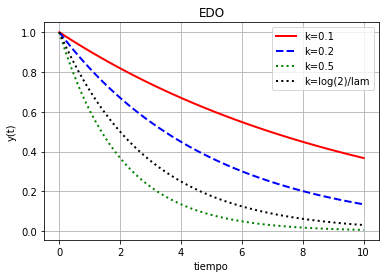

In [3]:
# funcion que devuelve dy/dt
def model(y, t, k):
    dydt = -k * y
    return dydt

# Condicion inicial
y0 = 1

# 50 puntos temporales
t = np.linspace(0, 10)

# resolucion ODEs
k = 0.1
y1 = odeint(model, y0, t, args=(k,))

k = 0.2
y2 = odeint(model, y0, t, args=(k,))

k = 0.5
y3 = odeint(model, y0, t, args=(k,))

lam = 2
k = np.log(2) / lam
y4 = odeint(model, y0, t, args=(k,))

# Graficar resultado
plt.plot(t, y1, 'r-', linewidth=2, label='k=0.1')
plt.plot(t, y2, 'b--', linewidth=2, label='k=0.2')
plt.plot(t, y3, 'g:', linewidth=2, label='k=0.5')
plt.plot(t, y4, 'k:', linewidth=2, label='k=log(2)/lam')
plt.xlabel('tiempo')
plt.ylabel('y(t)')
plt.title('EDO')
plt.legend()
plt.grid()
plt.show()

## Ejemplo 1

Encuentre una solucion numerica para las siguientes ecuaciones diferenciales con las condiciones iniciales asociadas. Expanda el horizonte de tiempo solicitado hasta que la solucion alcance un estado estable. Muestre una grafica de los estados $(x(t)$ y/o $y(t))$.
Informe el valor final de cada estado como $t \to \infty$

\begin{align*}
    \frac{dy(t)}{dt} = -y(t) + 1
\end{align*}
\begin{align*}
    y(0) = 0
\end{align*}

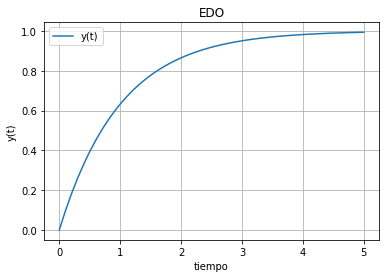

In [4]:
# funcion que devuelve el valor
def model(y, t):
    dydt = -y + 1.0
    return dydt

# Condicion inicial
y0 = 0

# 50 puntos temporales
t = np.linspace(0, 5)

# resolucion de ODE
y = odeint(model, y0, t)

# Graficar resultados
plt.plot(t, y, label='y(t)')
plt.xlabel('tiempo')
plt.ylabel('y(t)')
plt.title('EDO')
plt.legend()
plt.grid()
plt.show()

## Ejemplo 2

\begin{align*}
    5 \frac{dy(t)}{dt} = -y(t) + u(t)
\end{align*}
\begin{align*}
    y(0) = 1
\end{align*}

*u* pasos desde 0 a 2 con $t = 10$

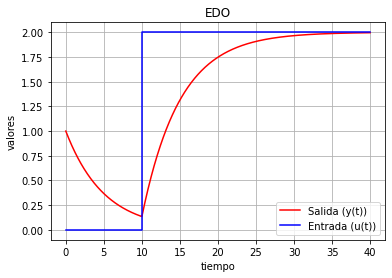

In [5]:
# Funcion que devuelve el valor
def model(y, t):
    # u pasos desde 0 a 2 a t = 10
    if t < 10.0:
        u = 0
    else:
        u = 2
    dydt = (-y + u)/5.0
    return dydt

# Condicion inicial
y0 = 1

# 1000 puntos temporales
t = np.linspace(0, 40, 1000)

# resolucion de ODE
y = odeint(model, y0, t)

# Graficar resultados
plt.plot(t, y, 'r-', label='Salida (y(t))')
plt.plot([0, 10, 10, 40], [0, 0, 2, 2], 'b-', label='Entrada (u(t))')
plt.title('EDO')
plt.ylabel('valores')
plt.xlabel('tiempo')
plt.legend(loc='best')
plt.grid()
plt.show()

## Ejemplo 3

Resolver para $x(t)$ e $y(t)$ y mostrar que las soluciones son equivalentes.

$$\frac{dx(t)}{dt} = 3\ exp(-t)$$

$$\frac{dy(t)}{dt} = 3 - y(t)$$

$$x(0) = 0$$

$$y(0) = 0$$

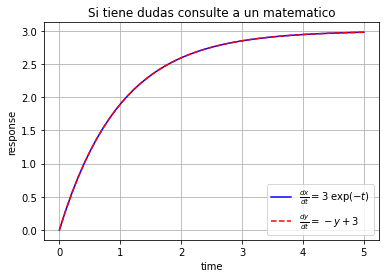

In [6]:
# Funcion que devuelve el valor dz/dt
def model(z, t):
    dxdt = 3.0 * np.exp(-t)
    dydt = -z[1] + 3
    dzdt = [dxdt, dydt]
    return dzdt

# Condicion inicial
z0 = [0, 0]

# 50 puntos temporales
t = np.linspace(0, 5)

# resolucion de ODE
z = odeint(model, z0, t)

# Graficar resultados
plt.plot(t, z[:, 0], 'b-', label=r'$\frac{dx}{dt} = 3 \; \exp(-t)$')
plt.plot(t, z[:, 1], 'r--', label=r'$\frac{dy}{dt}=-y+3$')
plt.title('Si tiene dudas consulte a un matematico')
plt.ylabel('response')
plt.xlabel('time')
plt.legend(loc='best')
plt.grid()
plt.show()

## Ejemplo 4

$$2\ \frac{dx(t)}{dt} = -x(t) + u(t)$$

$$5\ \frac{dy(t)}{dt} = -y(t) + x(t)$$

$$u = 2\ S(t-5)$$

$$x(0) = 0$$

$$y(0) = 0$$

donde $S(t - 5)$ es una funcion escalonada que cambia de ceroa  uno en $t = 5$.  
Cuando se multiplica por dos, cambia de cero a  dos al mismo tiempo, $t = 5$.

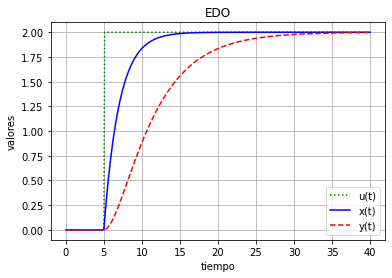

In [7]:
# Funcion que devuelve el valor de dz/dt
def model(z, t, u):
    x = z[0] # desdoblamos las variables
    y = z[1]
    dxdt = (-x + u)/2.0
    dydt = (-y +x)/5.0
    dzdt = [dxdt, dydt]
    return dzdt # reunificamos las variables

# Condicion inicial
z0 = [0, 0]

# Numero de puntos temporales
n = 401

# Puntos temporales
t = np.linspace(0, 40, n)

# Paso de entrada, funcion escalon
u = np.zeros(n)

# cambio a 2.0 el tiempo = 5.0
u[51:] = 2.0

# Guardado de soluciones
x = np.empty_like(t)
y = np.empty_like(t)

# Guardado de las condiciones iniciales
x[0] = z0[0]
y[0] = z0[1]

# Resolucion de la ODE
for i in range(1, n):
    # Intervalo para el proximo paso de tiempo
    tspan = [t[i-1], t[i]]
    # Resolver para el siguiente paso
    z = odeint(model, z0, tspan, args=(u[i],))
    # Almacenar solucion para trazar
    x[i] = z[1][0]
    y[i] = z[1][1]
    # Siguiente condicion inicial
    z0 = z[1]

# Graficar resultados
plt.plot(t, u, 'g:', label='u(t)')
plt.plot(t, x, 'b-', label='x(t)')
plt.plot(t, y, 'r--', label='y(t)')
plt.title('EDO')
plt.ylabel('valores')
plt.xlabel('tiempo')
plt.legend(loc='best')
plt.grid()
plt.show()